In [3]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as prepro
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions as plt_reg
import warnings
warnings.filterwarnings("ignore")

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.6, random_state=1, stratify= y_test)

C_vals = [] # 10^3 up to 10^3, step = 10^1
g_vals = [] # 10^-11 up to 10^3, step= 10^1
C_i = 0.001 # 10^-3
g_i = 0.00000000001 # 10^-11

for i in range(7):
    C_vals.append(C_i)
    C_i*=10
for i in range(15):
    g_vals.append(g_i)
    g_i*=10
    g_i = round(g_i,11-i)
    
scores = np.empty((len(C_vals),3))

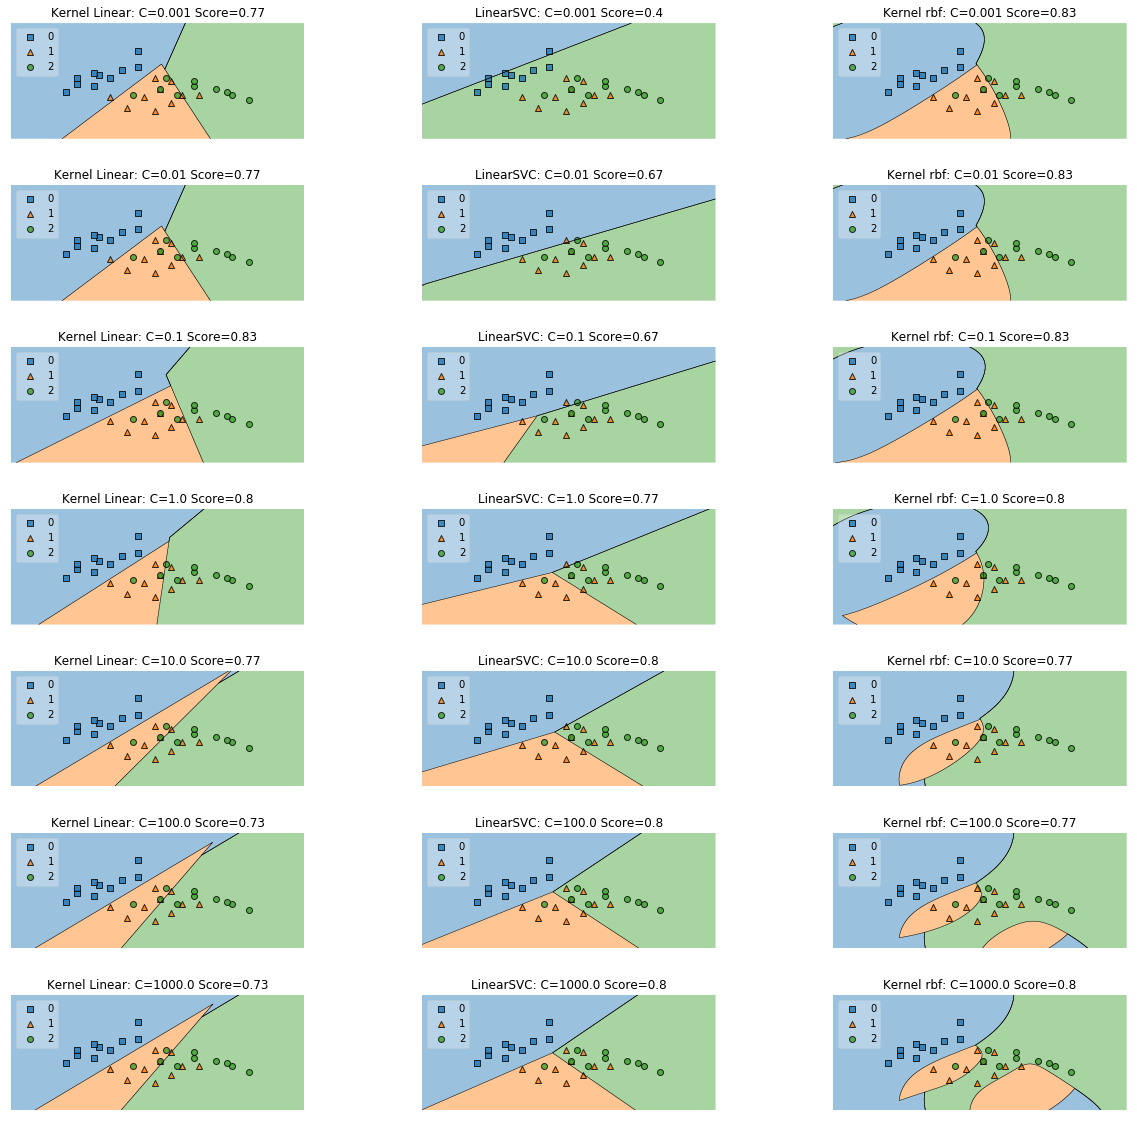

In [4]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for j,C in enumerate(C_vals):
    fig.add_subplot(7, 3, i+1)
    model_k = svm.SVC(kernel='linear', C=C)
    model_l = svm.LinearSVC(C=C, max_iter=1000000)
    model_rbf = svm.SVC(kernel='rbf', C=C, gamma='auto')
    model_k.fit(x_train, y_train)
    model_l.fit(x_train, y_train)
    model_rbf.fit(x_train, y_train)
    scores[j,0] = model_k.score(x_val, y_val)
    scores[j,1] = model_l.score(x_val, y_val)
    scores[j,2] = model_rbf.score(x_val, y_val)
    plt_reg(x_val, y_val, clf=model_k, legend=2)
    plt.title("Kernel Linear: C = {} Score = {}".format(str(C), str(round(scores[j, 0], 2))))
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(7, 3, i+2)
    plt_reg(x_val,y_val,clf=model_l, legend=2)
    plt.title("Kernel Linear: C = {} Score = {}".format(str(C), str(round(scores[j, 1], 2))))
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(7, 3, i+3)
    plt_reg(x_val,y_val,clf=model_rbf, legend=2)
    plt.title("Kernel Linear: C = {} Score = {}".format(str(C), str(round(scores[j, 2], 2))))
    plt.xticks([])
    plt.yticks([])
    i += 3
plt.show()

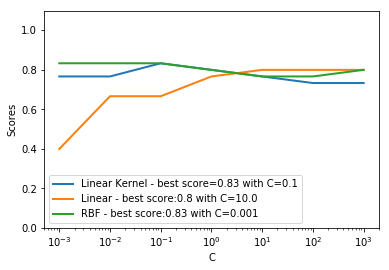

In [5]:
param_range = np.logspace(-3, 3, len(C_vals))
plt.ylim(0.0, 1.1)
lw = 2
bestC = np.empty((len(scores), 3))
for j in range(len(scores[0])):
        c, value = max(enumerate(scores[:,j]),key=operator.itemgetter(1))
        bestC[j,0] = C_vals[c]
        bestC[j,1] = value
        bestC[j,2] = c

plt.semilogx(param_range, scores[:,0], label="Linear Kernel - best score="+str(round(bestC[0,1],2))+" with C="+str(bestC[0,0]), lw=lw)
plt.semilogx(param_range, scores[:,1], label="Linear - best score:"+str(round(bestC[1,1],2))+" with C="+str(bestC[1,0]), lw=lw)
plt.semilogx(param_range, scores[:,2], label="RBF - best score:"+str(round(bestC[2,1],2))+" with C="+str(bestC[2,0]), lw=lw)
plt.xlabel('C')
plt.ylabel('Scores')
plt.legend(loc='best')
plt.show()

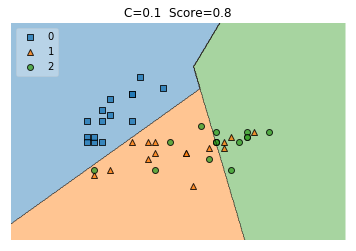

In [6]:
C = bestC[0,0] 
model_k = svm.SVC(kernel='linear', C=C)
model_k.fit(x_train, y_train)
test_score = model_k.score(x_test, y_test)
plt_reg(x_test, y_test, clf=model_k, legend=2)
plt.title("C = {} Score = {}".format(str(C), str(round(test_score,2))))
plt.xticks([])
plt.yticks([])
plt.show()

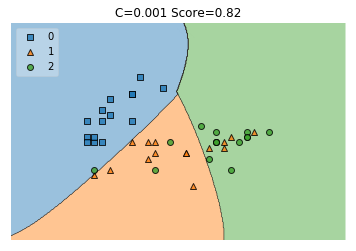

In [7]:
C = bestC[2,0] # Best C value rbf
model_rbf = svm.SVC(kernel='rbf', C=C, gamma='auto')
model_rbf.fit(x_train,y_train)
test_score = model_rbf.score(x_test,y_test)
plt_reg(x_test,y_test,clf=model_rbf, legend=2)
plt.title("C = {} Score = {}".format(str(C), str(round(test_score,2))))
plt.xticks([])
plt.yticks([])
plt.show()

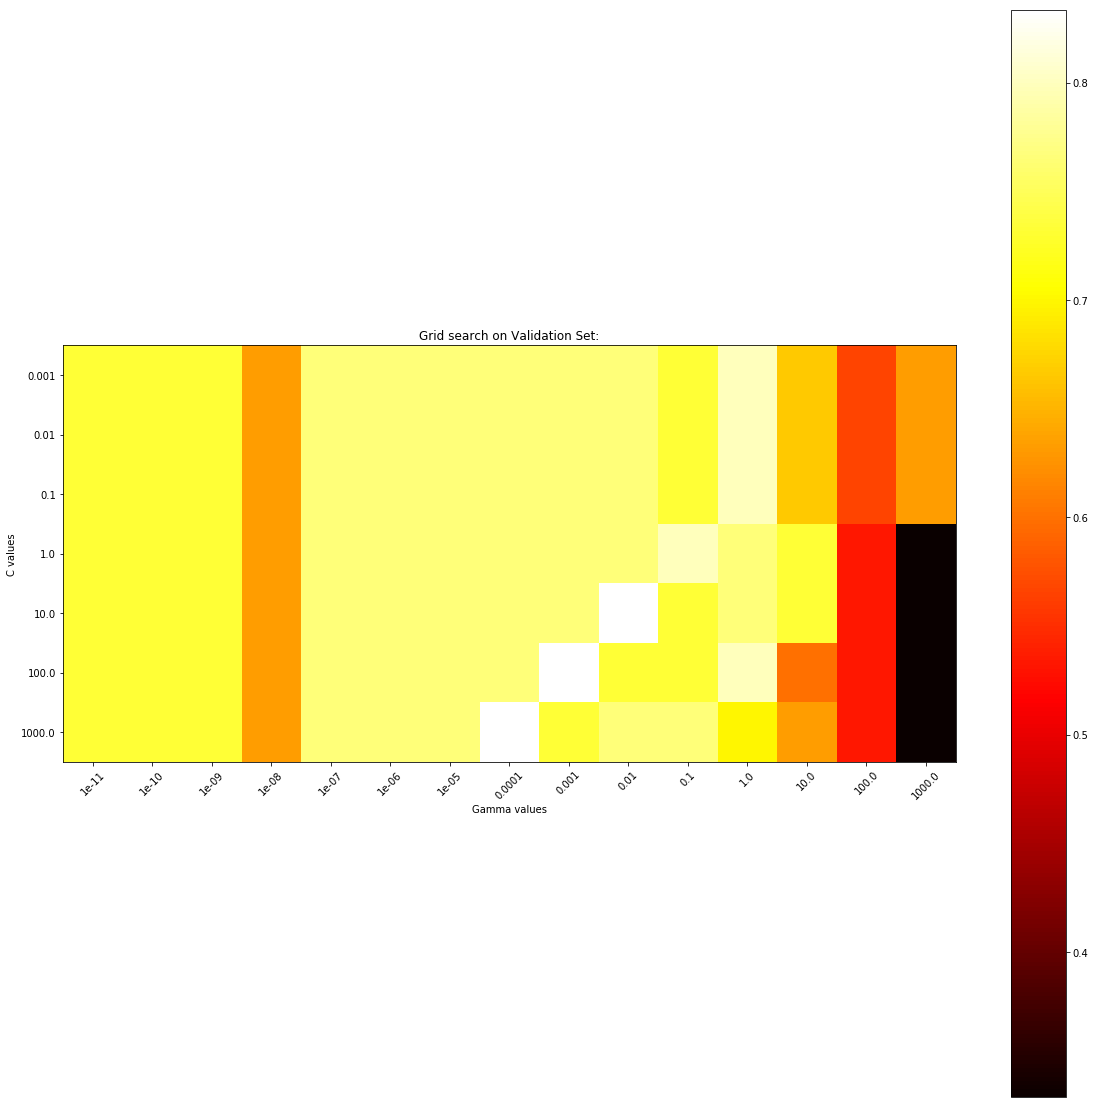

Best score=0.83 with C=10.0 Gamma=0.01


In [8]:
best_vals = np.empty(3)
scores = np.empty((len(C_vals),len(g_vals)))
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i,C in enumerate(C_vals):
    for j,g in enumerate(g_vals):
        model_rbf = svm.SVC(kernel='rbf', C=C, gamma=g)
        model_rbf.fit(x_train,y_train)
        score = model_rbf.score(x_val,y_val)
        scores[i][j] = score
        if score > best_vals[0]:
            best_vals[0] = score
            best_vals[1] = C
            best_vals[2] = g
plt.imshow(scores.reshape(len(C_vals),len(g_vals)),interpolation='nearest',cmap=plt.cm.hot)
plt.xlabel('Gamma values')
plt.ylabel('C values')
plt.colorbar()
plt.xticks(np.arange(len(g_vals)),g_vals,rotation = 45)
plt.yticks(np.arange(len(C_vals)),C_vals)
plt.title('Grid search on Validation Set:')
plt.show()
print("Best score = {} with C = {} and Gamma = {}".format(str(round(best_vals[0],2)), str(best_vals[1]), str(best_vals[2])))

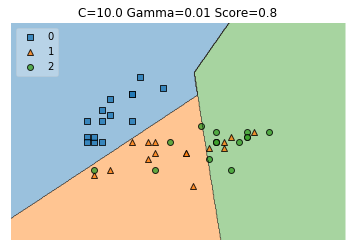

In [9]:
model_rbf = svm.SVC(kernel='rbf', C=best_vals[1], gamma=best_vals[2])
model_rbf.fit(x_train, y_train)
test_score = model_rbf.score(x_test, y_test)
plt_reg(x_test,y_test, clf=model_rbf, legend=2)
plt.title("C = {} Gamma = {} Test score = {}".format(str(best_vals[1]), str(best_vals[2]), str(round(test_score,2)))
plt.xticks([])
plt.yticks([])
plt.show()

K-fold grid search with k = 5
Best average score=0.81 with C=10.0 Gamma=0.1


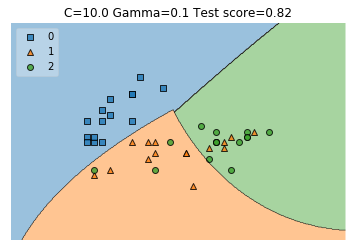

In [10]:
k = 5
x_folds = np.concatenate((x_train,x_val),axis=0)
y_folds = np.concatenate((y_train,y_val))
best_vals = np.empty(3)
xk_folds = np.array_split(x_folds,k)
yk_folds = np.array_split(y_folds,k)
for i,C in enumerate(C_vals):
    for j,g in enumerate(g_vals):
        avg_score = 0
        for z in range(k):
            xk_train = list(xk_folds)
            xk_val = xk_train.pop(z)
            xk_train = np.concatenate(xk_train)
            yk_train = list(yk_folds)
            yk_val = yk_train.pop(z)
            yk_train = np.concatenate(yk_train)
            model_rbf = svm.SVC(kernel='rbf', C=C, gamma=g)
            model_rbf.fit(xk_train,yk_train)
            avg_score += model_rbf.score(xk_val,yk_val)
        avg_score /= k
        if avg_score > best_vals[0]:
            best_vals[0] = avg_score
            best_vals[1] = C
            best_vals[2] = g
print("K-fold grid search with k = {}".format(str(k)))
print("Best average score= {} with C = {} and Gamma = {}".format(str(round(best_vals[0],2)), str(best_vals[1]), str(best_vals[2]))
model_rbf = svm.SVC(kernel='rbf', C=best_vals[1], gamma=best_vals[2])
model_rbf.fit(x_folds,y_folds)
test_score = model_rbf.score(x_test, y_test)
plt_reg(x_test, y_test, clf=model_rbf, legend=2)
plt.title("C = {} Gamma = {} Test score = {}".format(str(best_vals[1]), str(best_vals[2]), str(round(test_score,2)))
plt.xticks([])
plt.yticks([])
plt.show()